# _________________________________________________________________________________________

# Project – 2
## Shopping Behavior Data Analysis
#### Statistical plots & Distribution analysis & Visulaization 
- Dataset: Shopping Behavior Dataset
- Read Dataset, Inspect Structure, Summary Statistics, Histogram, Kde Plot, Correlation, Detect Outlier.

## Step 1: Import Libraries

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Step 2: Read CSV

In [3]:
data = pd.read_csv('shopping_behavior.csv')
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Yes,31,PayPal,Annually


## Step 3: Inspect Data 

In [4]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Yes,31,PayPal,Annually


In [5]:
data.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,No,33,Venmo,Quarterly


In [6]:
data.shape

(3900, 16)

In [8]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [10]:
data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Discount Applied          0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [36]:
# Detect column types
numeric_cols = data.select_dtypes(include=['int64','float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: Index(['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating',
       'Previous Purchases'],
      dtype='object')
Categorical Columns: Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Discount Applied', 'Payment Method',
       'Frequency of Purchases'],
      dtype='object')


## Statistical Plots & Distribution Analysis

### Histogram – Purchase Amount Distribution

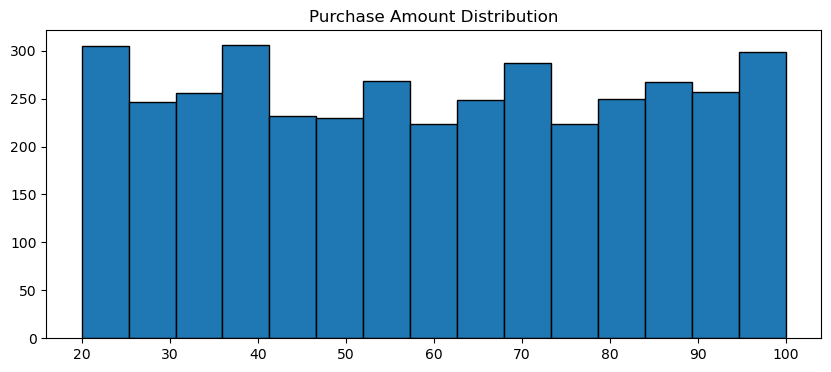

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,4))
plt.hist(data['Purchase Amount (USD)'], bins=15, edgecolor='black')
plt.title('Purchase Amount Distribution')
plt.show()

#### Insight
- This histogram displays a relatively uniform distribution of purchase amounts ranging from 20 to 100, with frequency counts for each bin consistently falling between approximately 220 and 310.

### KDE Plot – Age Distribution 

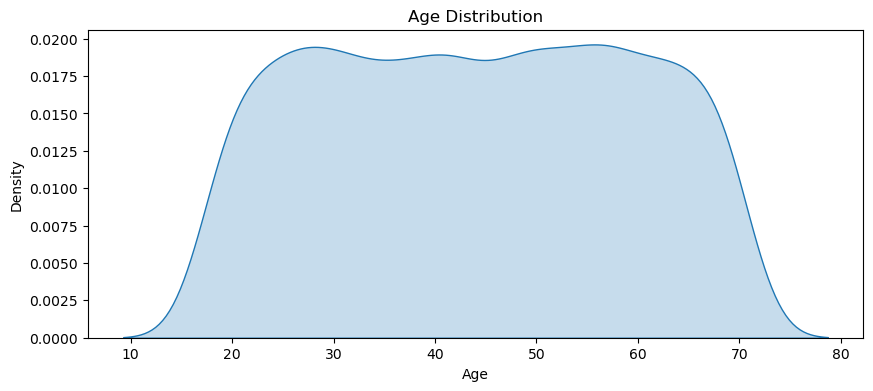

In [17]:
plt.figure(figsize=(10,4))
sns.kdeplot(data['Age'], fill=True)
plt.title('Age Distribution')
plt.show()

#### Insight
- This kernel density estimate plot shows a near-uniform age distribution between 20 and 70, with a density consistently near 0.0175–0.0200 before tapering off at the extremes.

### Boxplot – Outlier Detection (Purchase Amount)

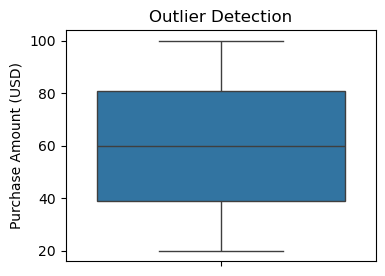

In [19]:
plt.figure(figsize=(4,3))
sns.boxplot(data['Purchase Amount (USD)'])
plt.title('Outlier Detection')
plt.show()

#### Insight
- The first chart shows a near-uniform age distribution peaking around a density of 0.02 between ages 20 and 70
- While the second indicates a symmetric purchase distribution centered at a median of 60 USD with no detectable outliers.

### Group Comparison – Gender vs Purchase Amount

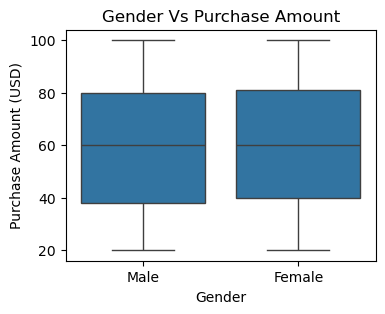

In [20]:
plt.figure(figsize=(4,3))
sns.boxplot(x='Gender', y='Purchase Amount (USD)',data=data)
plt.title('Gender Vs Purchase Amount')
plt.show()

### Skewness - Age & Purchase Amount

In [22]:
print("Skewness:")
print(data[['Age', 'Purchase Amount (USD)']].skew())

Skewness:
Age                     -0.006380
Purchase Amount (USD)    0.012702
dtype: float64


#### Insight
- Age and Purchase Amount are approximately normally distributed, as skewness values are very close to zero.

### Heat Map - Correlation Analysis

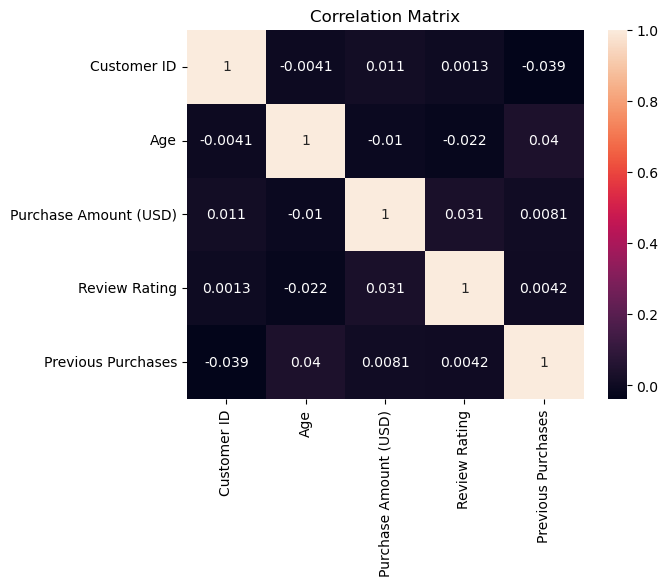

In [24]:
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix")
plt.show()

#### Insight
- There is no strong linear relationship between the numerical variables, as all correlation values are close to zero.

### Pie chart - Payment Method Distribution

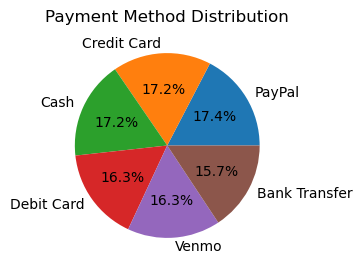

In [26]:
plt.figure(figsize=(4,3))
data['Payment Method'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

#### Insight
- Payment methods are almost evenly distributed, indicating no dominant transaction preference among customers.

###  Bar Chart - Category Revenue

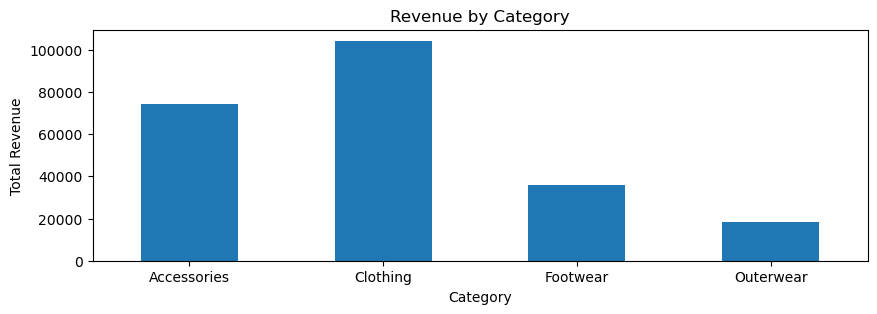

In [29]:
category_sales = data.groupby('Category')['Purchase Amount (USD)'].sum()

plt.figure(figsize=(10,3))
category_sales.plot(kind='bar',rot=0)
plt.title('Revenue by Category')
plt.ylabel('Total Revenue')
plt.show()

#### Insight
- Clothing generates the highest revenue, followed by Accessories, while Outerwear contributes the least.

### Scatter Plot - First Two Numeric Columns

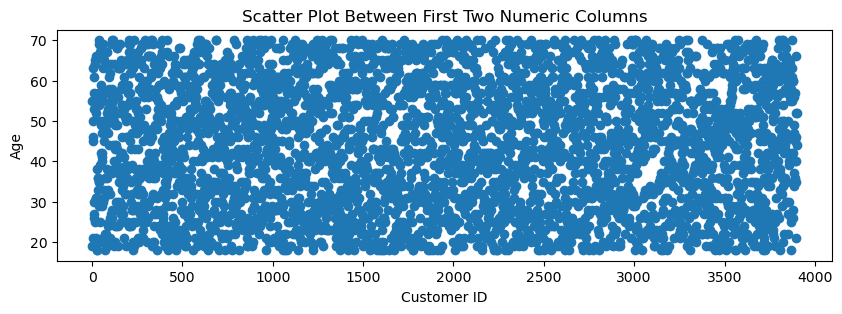

In [33]:
plt.figure(figsize=(10,3))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1])
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title("Scatter Plot Between First Two Numeric Columns")
plt.show()

#### Insight
- The scatter plot shows no visible relationship between Customer ID and Age, confirming Customer ID is simply an identifier.

### Violin Plot - Gender Distribution

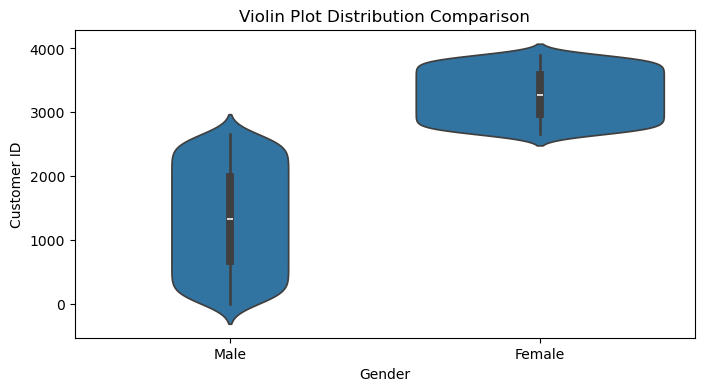

In [38]:
plt.figure(figsize=(8,4))
sns.violinplot(x=data.select_dtypes(include='object').columns[0], y=data.select_dtypes(include='number').columns[0], data=data)
plt.title("Violin Plot Distribution Comparison")
plt.xticks(rotation=0)
plt.show()

#### Insight 
- The violin plot shows distinct distribution ranges across genders, though Customer ID itself does not represent meaningful behavioral variation.

### Count Plot - Category Fequency

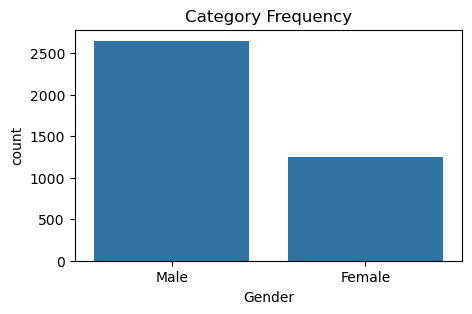

In [40]:
plt.figure(figsize=(5,3))
sns.countplot(x=data.select_dtypes(include='object').columns[0], data=data)
plt.title("Category Frequency")
plt.xticks(rotation=0)
plt.show()

#### Insight
- Male customers appear more frequently in the dataset compared to female customers.

### Area Chart - Numeric Trend

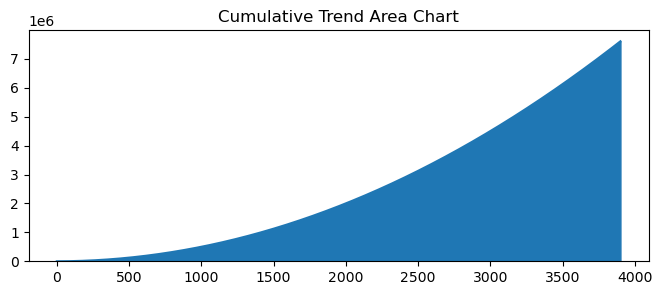

In [42]:
plt.figure(figsize=(8,3))
data.select_dtypes(include='number').iloc[:, 0].cumsum().plot(kind='area')
plt.title("Cumulative Trend Area Chart")
plt.show()

#### Insight
- The cumulative trend shows a steadily increasing growth pattern, indicating consistent aggregation over the dataset index.

# _________________________________________________________________________________________